In [1]:
import pandas as pd
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pySankey.sankey import sankey
import re
from datetime import datetime, timedelta
import time
import seaborn as sns
from pylab import rcParams
sns.set(style='whitegrid',palette='husl')
matplotlib.rcParams['pdf.fonttype'] = 42

from tabulate import tabulate

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_colwidth", 400)

%matplotlib inline

# Read in Data

In [2]:
df=pd.read_csv('tabula-totals_2018.csv',thousands=',')

In [3]:
df.head()

,specialty,native american,asian,black,hispanic,native hawaiian,white,other,multiple race/ethnicity,unknown race/ethnicity,non-citizen or permanent resident,total
0,Anesthesiology,5,440,171,114,1,845,39,157,17,33,1822
1,Child Neurology,1,41,19,20,0,106,6,20,2,1,216
2,Dermatology,1,166,53,43,0,394,16,50,8,8,739
3,Diagnostic Radiology/Nuclear Medicine/Nuclear Radiology,0,8,0,2,0,10,0,4,0,1,25
4,Emergency Medicine,3,316,173,147,1,1330,36,181,18,16,2221


In [4]:
df.specialty.unique()

array(['Anesthesiology', 'Child Neurology', 'Dermatology',
       'Diagnostic Radiology/Nuclear Medicine/Nuclear Radiology',
       'Emergency Medicine', 'Emergency Medicine/Anesthesiology',
       'Emergency Medicine/Family Medicine', 'Family Medicine',
       'Family Medicine/Osteopathic Neuromusculoskeletal Medicine',
       'Family Medicine/Preventive Medicine', 'Internal Medicine',
       'Internal Medicine/Anesthesiology',
       'Internal Medicine/Dermatology',
       'Internal Medicine/Emergency Medicine',
       'Internal Medicine/Family Practice',
       'Internal Medicine/Medical Genetics',
       'Internal Medicine/Pediatrics',
       'Internal Medicine/Preventive Medicine',
       'Internal Medicine/Psychiatry',
       'Interventional Radiology-Integrated',
       'Neurodevelopmental Disabilities', 'Neurological Surgery',
       'Neurology', 'Nuclear Medicine', 'Obstetrics and Gynecology',
       'Orthopaedic Surgery', 'Osteopathic Neuromusculoskeletal Medicine',
       'O

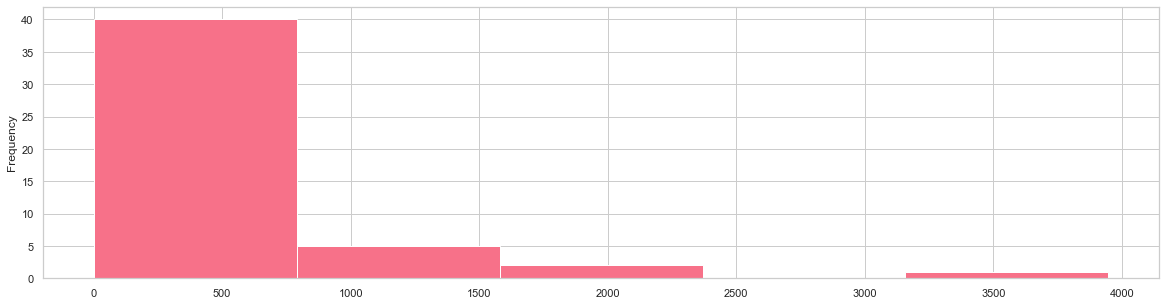

In [6]:
rcParams['figure.figsize'] = 20, 5
df.white.plot(kind='hist',bins=5)

In [7]:
df.columns[1:-1]

Index(['native american', 'asian', 'black', 'hispanic', 'native hawaiian',
       'white', 'other', 'multiple race/ethnicity', 'unknown race/ethnicity',
       'non-citizen or permanent resident'],
      dtype='object')

In [8]:
for c in df.columns[1:-1]:
    df[f'{c}_pct']=df[f'{c}']/df['total']*100

In [9]:
df.columns

Index(['specialty', 'native american', 'asian', 'black', 'hispanic',
       'native hawaiian', 'white', 'other', 'multiple race/ethnicity',
       'unknown race/ethnicity', 'non-citizen or permanent resident', 'total',
       'native american_pct', 'asian_pct', 'black_pct', 'hispanic_pct',
       'native hawaiian_pct', 'white_pct', 'other_pct',
       'multiple race/ethnicity_pct', 'unknown race/ethnicity_pct',
       'non-citizen or permanent resident_pct'],
      dtype='object')

# Bringing in Medical School Graduates 
Taking in Medical School graduates by percentage and then calculating the difference in % application distribution

In [10]:
grads=pd.read_csv('grads_cleaned.csv')

white_pct=float(grads[grads['year']==2018]['White_pct_grads'])
black_pct=float(grads[grads['year']==2018]['Black_pct_grads'])
asian_pct=float(grads[grads['year']==2018]['Asian_pct_grads'])
hispanic_pct=float(grads[grads['year']==2018]['Hispanic_pct_grads'])
native_american_pct=float(grads[grads['year']==2018]['American Indian/ Alaska Native_pct_grads'])
hawaiian_pct=float(grads[grads['year']==2018]['Native Hawaiian/ Pacific Islander_pct_grads'])
other_pct=float(grads[grads['year']==2018]['Other_pct_grads'])
multiple_pct=float(grads[grads['year']==2018]['Multiple Race/ Ethnicity_pct_grads'])
noncitizen_pct=float(grads[grads['year']==2018]['Non-U.S. Citizen/Non-Permanent Resident_pct_grads'])
unknown_pct=float(grads[grads['year']==2018]['Unknown Race/ Ethnicity_pct_grads'])

In [11]:
grads

,year,White_grads,Black_grads,Asian_grads,Hispanic_grads,American Indian/ Alaska Native_grads,Native Hawaiian/ Pacific Islander_grads,Other_grads,Multiple Race/ Ethnicity_grads,Non-U.S. Citizen/Non-Permanent Resident_grads,Unknown Race/ Ethnicity_grads,Total_grads,White_pct_grads,Black_pct_grads,Asian_pct_grads,Hispanic_pct_grads,American Indian/ Alaska Native_pct_grads,Native Hawaiian/ Pacific Islander_pct_grads,Other_pct_grads,Multiple Race/ Ethnicity_pct_grads,Non-U.S. Citizen/Non-Permanent Resident_pct_grads,Unknown Race/ Ethnicity_pct_grads
0,2014,10458.0,1052.0,3701.0,928.0,27.0,4.0,300.0,1168.0,365.0,75.0,18078.0,57.849320,5.819228,20.472397,5.133311,0.149353,0.022126,1.659476,6.460892,2.019029,0.414869
1,2015,10992.0,1061.0,3701.0,854.0,20.0,5.0,305.0,1326.0,355.0,86.0,18705.0,58.765036,5.672280,19.786153,4.565624,0.106923,0.026731,1.630580,7.089014,1.897888,0.459770
2,2016,10823.0,1036.0,3993.0,950.0,31.0,7.0,268.0,1361.0,354.0,115.0,18938.0,57.149646,5.470483,21.084592,5.016369,0.163692,0.036963,1.415144,7.186609,1.869258,0.607245
3,2017,10992.0,1061.0,3701.0,854.0,20.0,5.0,305.0,1326.0,355.0,86.0,18705.0,58.765036,5.672280,19.786153,4.565624,0.106923,0.026731,1.630580,7.089014,1.897888,0.459770
4,2018,10909.0,1119.0,4101.0,1059.0,21.0,9.0,356.0,1506.0,278.0,195.0,19553.0,55.791950,5.722907,20.973764,5.416049,0.107400,0.046029,1.820692,7.702143,1.421777,0.997289


In [12]:
df['white_diff']=df['white_pct']-white_pct
df['black_diff']=df['black_pct']-black_pct
df['asian_diff']=df['asian_pct']-asian_pct
df['hispanic_diff']=df['hispanic_pct']-hispanic_pct
df['native_american_diff']=df['native american_pct']-native_american_pct
df['hawaiian_diff']=df['native hawaiian_pct']-hawaiian_pct
df['other_diff']=df['other_pct']-other_pct
df['multiple_diff']=df['multiple race/ethnicity_pct']-multiple_pct
df['noncitizen_diff']=df['non-citizen or permanent resident_pct']-noncitizen_pct
df['unknown_diff']=df['unknown race/ethnicity_pct']-unknown_pct

# Adding Income in 
A survey of 20,000 Physicians from Medscape: https://www.medscape.com/slideshow/2019-compensation-overview-6011286#3
How much do Doctors make: https://www.theatlantic.com/health/archive/2015/01/physician-salaries/384846/

In [13]:
salaries=pd.read_csv('salaries.csv')

In [14]:
len(df.specialty.unique())

48

In [15]:
df.specialty.unique()

array(['Anesthesiology', 'Child Neurology', 'Dermatology',
       'Diagnostic Radiology/Nuclear Medicine/Nuclear Radiology',
       'Emergency Medicine', 'Emergency Medicine/Anesthesiology',
       'Emergency Medicine/Family Medicine', 'Family Medicine',
       'Family Medicine/Osteopathic Neuromusculoskeletal Medicine',
       'Family Medicine/Preventive Medicine', 'Internal Medicine',
       'Internal Medicine/Anesthesiology',
       'Internal Medicine/Dermatology',
       'Internal Medicine/Emergency Medicine',
       'Internal Medicine/Family Practice',
       'Internal Medicine/Medical Genetics',
       'Internal Medicine/Pediatrics',
       'Internal Medicine/Preventive Medicine',
       'Internal Medicine/Psychiatry',
       'Interventional Radiology-Integrated',
       'Neurodevelopmental Disabilities', 'Neurological Surgery',
       'Neurology', 'Nuclear Medicine', 'Obstetrics and Gynecology',
       'Orthopaedic Surgery', 'Osteopathic Neuromusculoskeletal Medicine',
       'O

In [16]:
medscape=df.merge(salaries,left_on='specialty',right_on=('special'),how='left')

In [17]:
medscape.salary.value_counts(dropna=False)

NaN      35
417.0     1
366.0     1
260.0     1
471.0     1
225.0     1
461.0     1
482.0     1
303.0     1
267.0     1
243.0     1
231.0     1
359.0     1
408.0     1
Name: salary, dtype: int64

In [18]:
medscape = medscape.dropna()

In [19]:
medscape.sort_values(by='salary',ascending=False)

,specialty,native american,asian,black,hispanic,native hawaiian,white,other,multiple race/ethnicity,unknown race/ethnicity,non-citizen or permanent resident,total,native american_pct,asian_pct,black_pct,hispanic_pct,native hawaiian_pct,white_pct,other_pct,multiple race/ethnicity_pct,unknown race/ethnicity_pct,non-citizen or permanent resident_pct,white_diff,black_diff,asian_diff,hispanic_diff,native_american_diff,hawaiian_diff,other_diff,multiple_diff,noncitizen_diff,unknown_diff,special,salary
25,Orthopaedic Surgery,3,153,60,41,0,683,19,84,10,9,1062,0.282486,14.406780,5.649718,3.860640,0.000000,64.312618,1.789077,7.909605,0.941620,0.847458,8.520668,-0.073189,-6.566984,-1.555408,0.175085,-0.046029,-0.031615,0.207462,-0.574319,-0.055670,Orthopaedic Surgery,482.0
36,Plastic Surgery-Integrated,1,82,26,19,0,172,7,33,2,9,351,0.284900,23.361823,7.407407,5.413105,0.000000,49.002849,1.994302,9.401709,0.569801,2.564103,-6.789101,1.684500,2.388060,-0.002943,0.177500,-0.046029,0.173610,1.699567,1.142326,-0.427489,Plastic Surgery-Integrated,471.0
27,Otolaryngology,1,111,33,28,0,254,17,41,1,8,494,0.202429,22.469636,6.680162,5.668016,0.000000,51.417004,3.441296,8.299595,0.202429,1.619433,-4.374946,0.957255,1.495872,0.251968,0.095029,-0.046029,1.620603,0.597452,0.197656,-0.794860,Otolaryngology,461.0
46,Urology,0,71,14,20,0,193,4,31,9,4,346,0.000000,20.520231,4.046243,5.780347,0.000000,55.780347,1.156069,8.959538,2.601156,1.156069,-0.011603,-1.676664,-0.453532,0.364298,-0.107400,-0.046029,-0.664623,1.257395,-0.265707,1.603867,Urology,417.0
0,Anesthesiology,5,440,171,114,1,845,39,157,17,33,1822,0.274424,24.149286,9.385291,6.256861,0.054885,46.377607,2.140505,8.616905,0.933041,1.811196,-9.414343,3.662384,3.175523,0.840812,0.167023,0.008856,0.319812,0.914762,0.389420,-0.064249,Anesthesiology,408.0
43,Surgery-General,12,612,264,220,2,1626,69,307,31,63,3206,0.374298,19.089208,8.234560,6.862133,0.062383,50.717405,2.152215,9.575795,0.966937,1.965066,-5.074545,2.511653,-1.884556,1.446085,0.266898,0.016354,0.331522,1.873652,0.543289,-0.030352,Surgery-General,366.0
4,Emergency Medicine,3,316,173,147,1,1330,36,181,18,16,2221,0.135074,14.227825,7.789284,6.618640,0.045025,59.882936,1.620891,8.149482,0.810446,0.720396,4.090986,2.066377,-6.745938,1.202592,0.027674,-0.001004,-0.199801,0.447339,-0.701380,-0.186844,Emergency Medicine,359.0
24,Obstetrics and Gynecology,1,193,172,89,1,792,16,124,9,18,1415,0.070671,13.639576,12.155477,6.289753,0.070671,55.971731,1.130742,8.763251,0.636042,1.272085,0.179781,6.432570,-7.334188,0.873704,-0.036729,0.024643,-0.689950,1.061108,-0.149692,-0.361247,Obstetrics and Gynecology,303.0
22,Neurology,0,196,59,55,0,342,8,43,7,13,723,0.000000,27.109267,8.160443,7.607192,0.000000,47.302905,1.106501,5.947441,0.968188,1.798064,-8.489046,2.437536,6.135503,2.191144,-0.107400,-0.046029,-0.714192,-1.754702,0.376287,-0.029101,Neurology,267.0
38,Psychiatry,2,356,134,118,1,781,39,151,13,20,1615,0.123839,22.043344,8.297214,7.306502,0.061920,48.359133,2.414861,9.349845,0.804954,1.238390,-7.432817,2.574307,1.069580,1.890453,0.016439,0.015891,0.594168,1.647702,-0.183387,-0.192336,Psychiatry,260.0


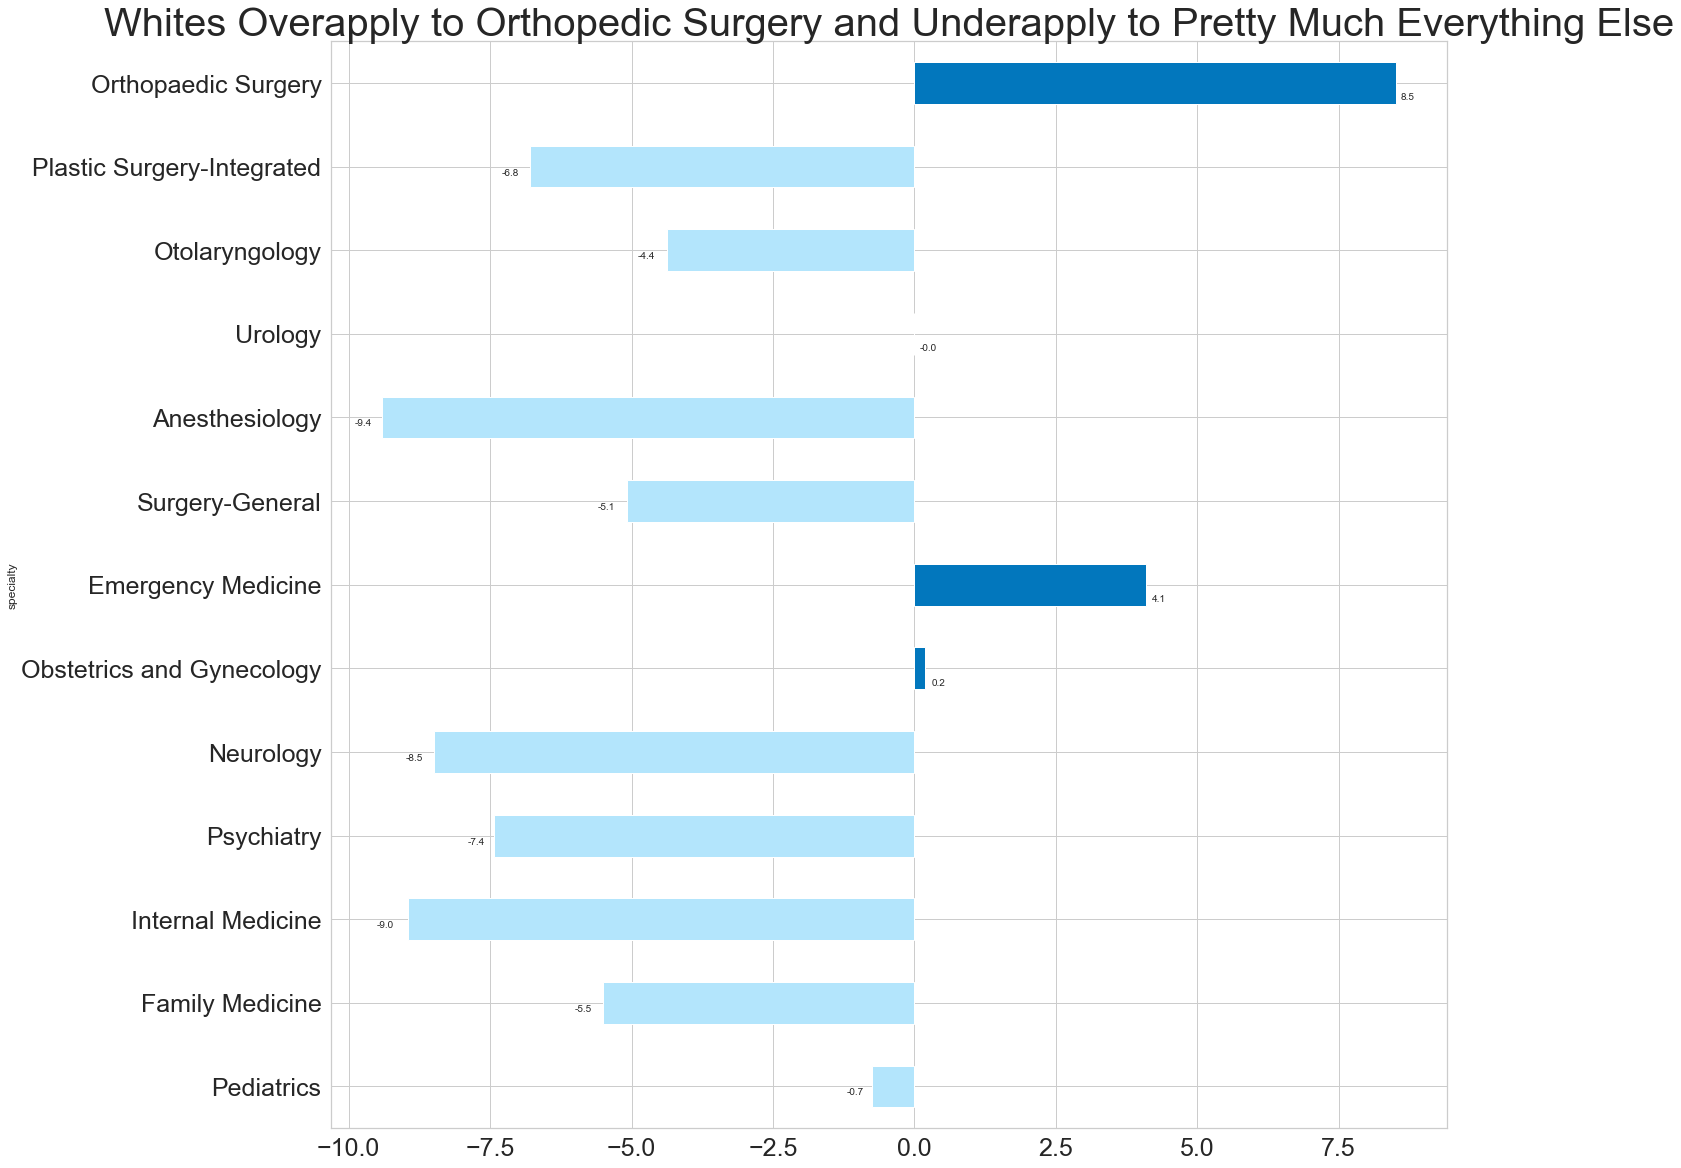

In [57]:
rcParams['figure.figsize'] = 20, 20
white=medscape[['specialty','white_diff','salary']].sort_values(by='salary')
white['c'] = np.where(white.white_diff>0, '#0277bd', '#b3e5fc')
ax=white.plot(kind='barh',x='specialty',y='white_diff',color=white['c'])
ax.get_legend().remove()

for i, v in enumerate(white['white_diff'].apply(lambda x: round(x, 1)).reset_index(drop=True)):
    if v<0:
        ax.text(v-0.5, i-0.1, str(v))
    else:
        ax.text(v+0.1, i-0.2, str(v))
        
    
plt.title('Whites Overapply to Orthopedic Surgery and Underapply to Pretty Much Everything Else',{'fontsize': 40,'fontweight' : 1})
plt.tick_params(labelsize=25)
plt.savefig("whites_residencies_medscape.pdf")

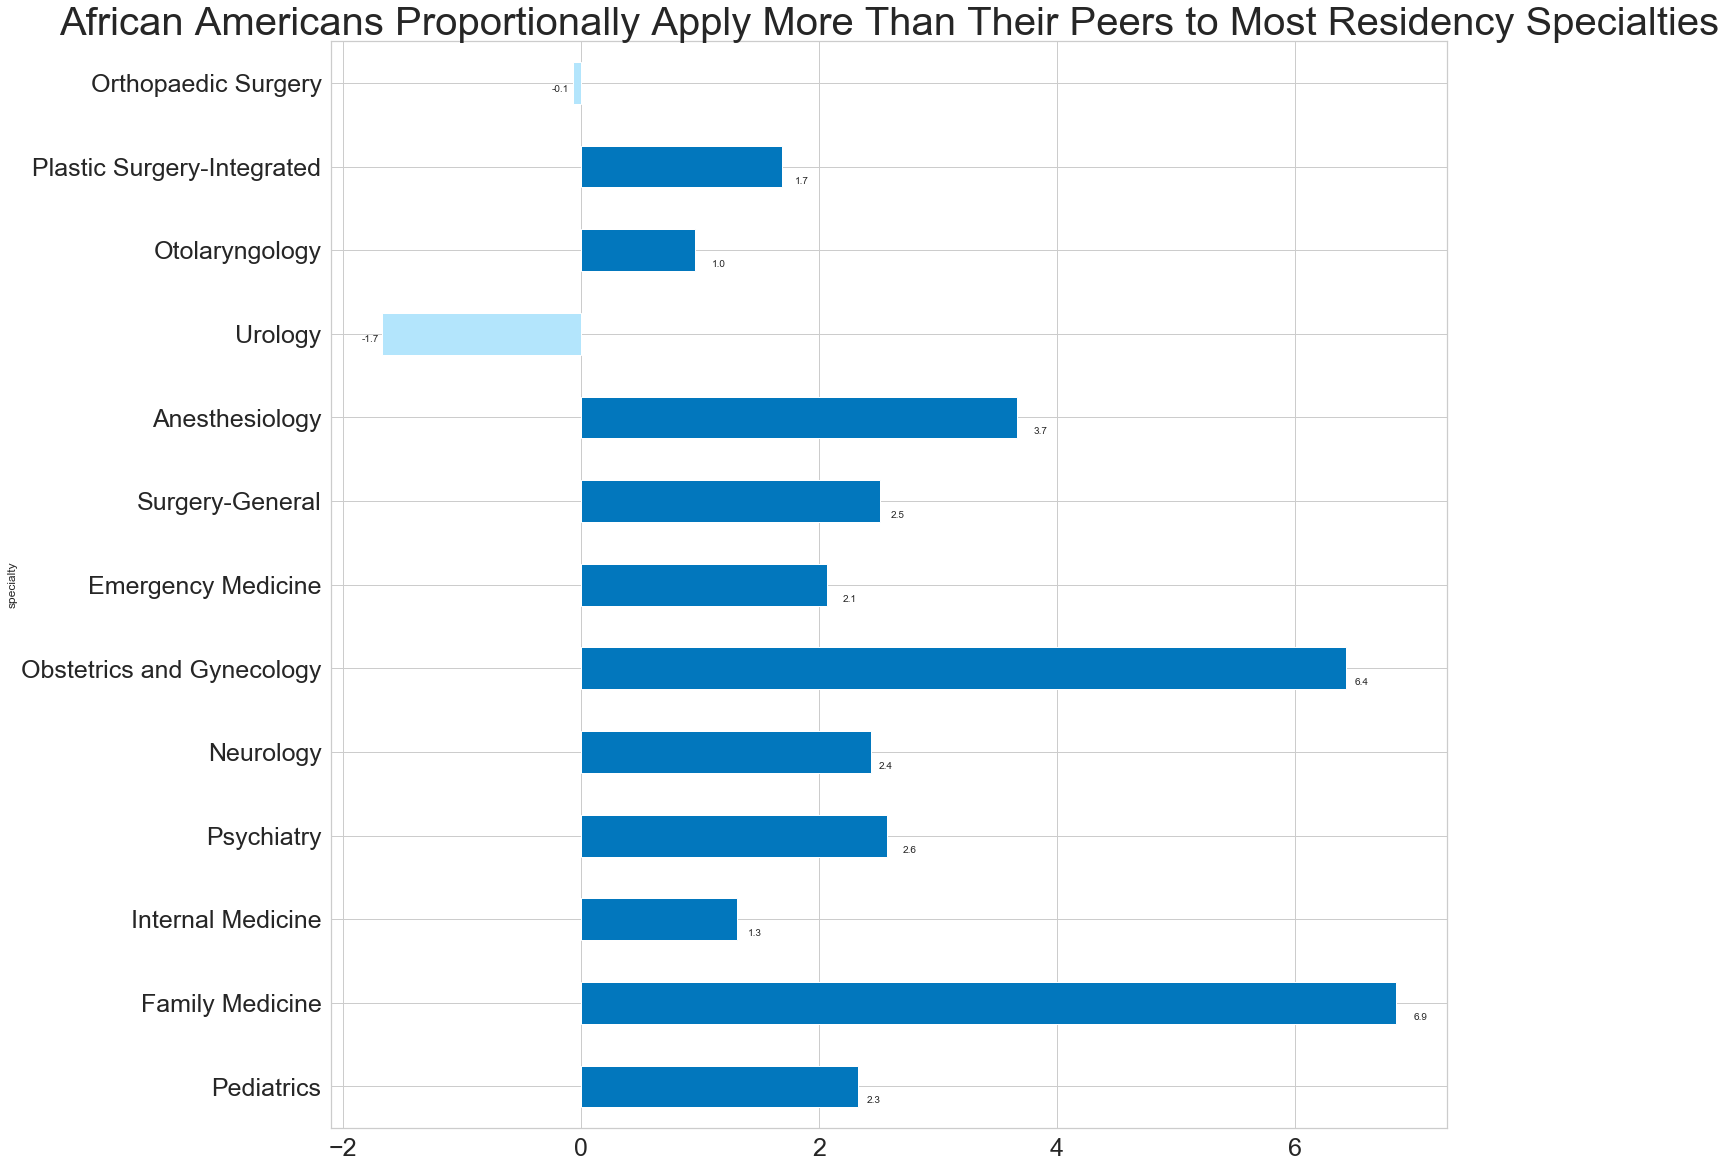

In [59]:
rcParams['figure.figsize'] = 20, 20
black=medscape[['specialty','black_diff','salary']].sort_values(by='salary')
black['c'] = np.where(black.black_diff>0, '#0277bd', '#b3e5fc')
ax=black.plot(kind='barh',x='specialty',y='black_diff',color=black['c'])
ax.get_legend().remove()

for i, v in enumerate(black['black_diff'].apply(lambda x: round(x, 1)).reset_index(drop=True)):
    if v<0:
        ax.text(v-0.15, i-0.1, str(v))
    else:
        ax.text(v+0.1, i-0.2, str(v))

plt.title('African Americans Proportionally Apply More Than Their Peers to Most Residency Specialties',{'fontsize': 40,'fontweight' : 1})
plt.tick_params(labelsize=25)
plt.savefig("black_residencies_medscape.pdf")


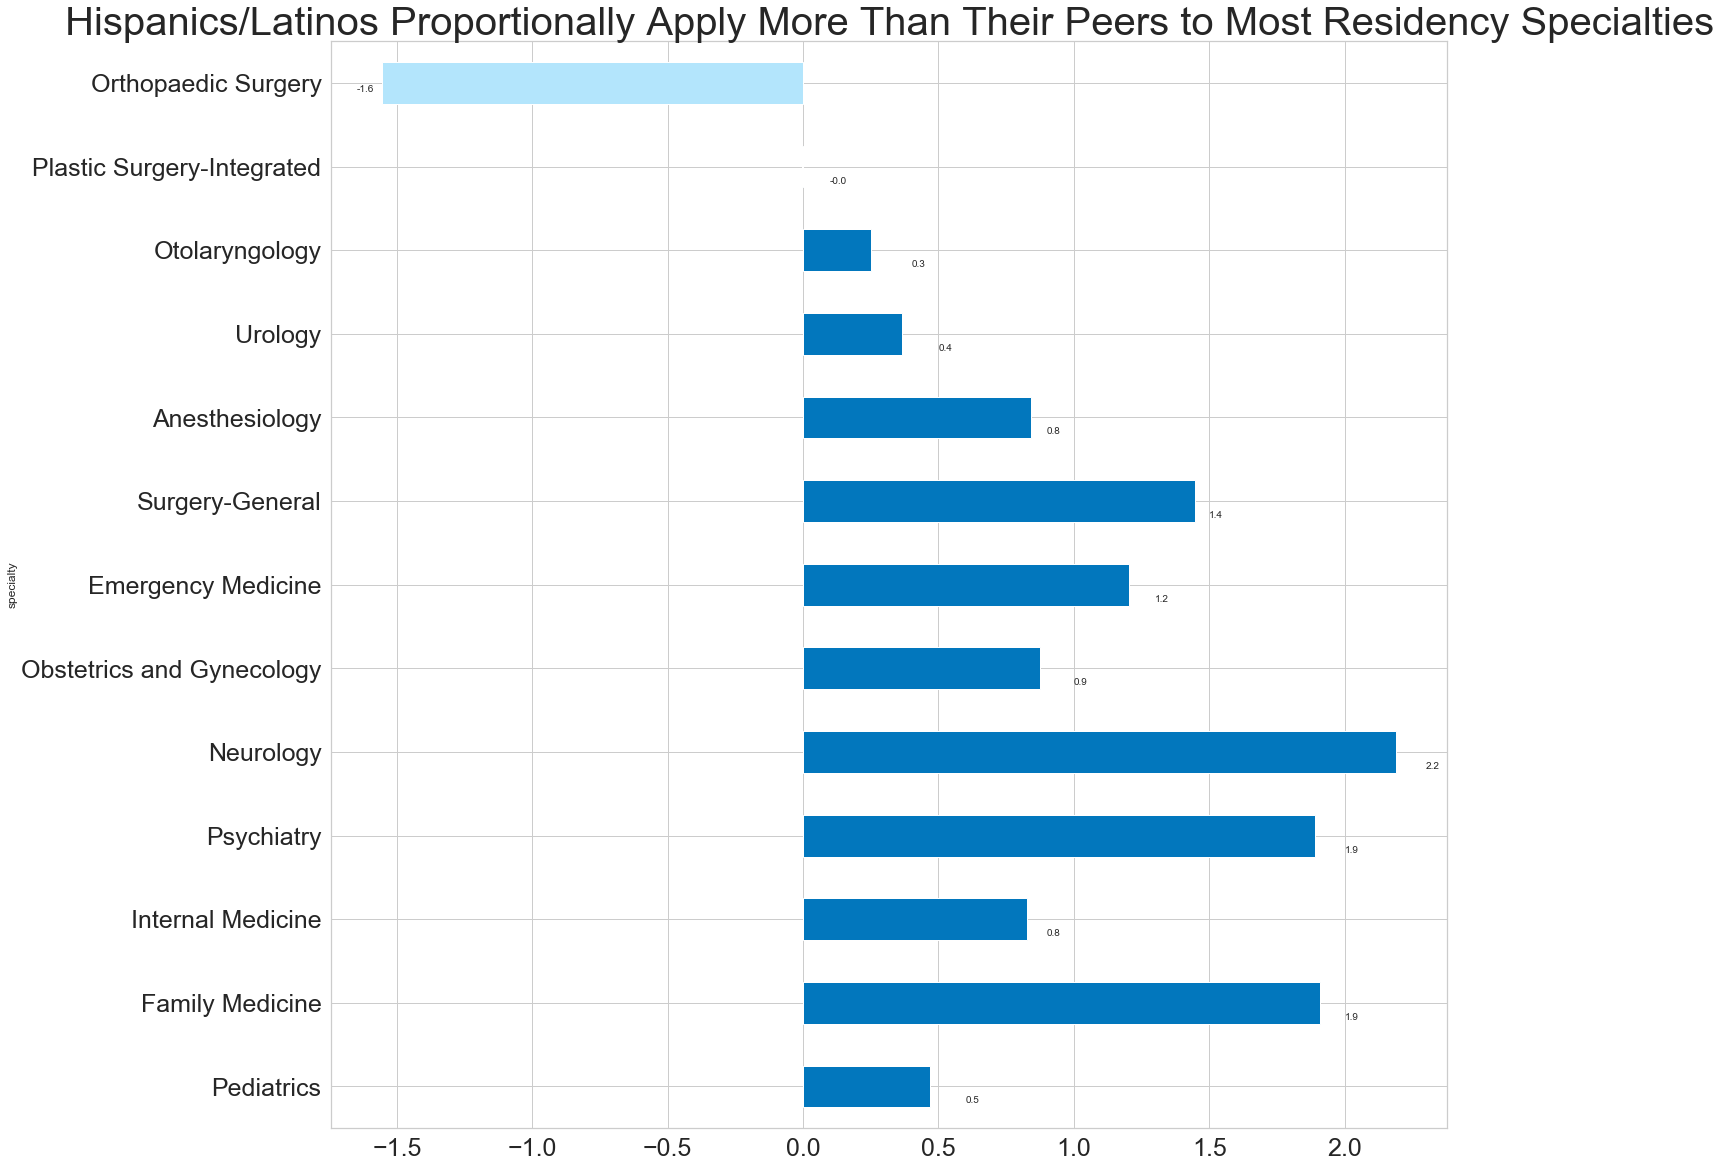

In [60]:
rcParams['figure.figsize'] = 20, 20
hispanic=medscape[['specialty','hispanic_diff','salary']].sort_values(by='salary')
hispanic['c'] = np.where(hispanic.hispanic_diff>0, '#0277bd', '#b3e5fc')
ax=hispanic.plot(kind='barh',x='specialty',y='hispanic_diff',color=hispanic['c'])
ax.get_legend().remove()

for i, v in enumerate(hispanic['hispanic_diff'].apply(lambda x: round(x, 1)).reset_index(drop=True)):
    if v<0:
        ax.text(v-0.05, i-0.1, str(v))
    else:
        ax.text(v+0.1, i-0.2, str(v))

plt.title('Hispanics/Latinos Proportionally Apply More Than Their Peers to Most Residency Specialties',{'fontsize': 40,'fontweight' : 1})
plt.tick_params(labelsize=25)
plt.savefig("hispanic_residencies_medscape.pdf")

        

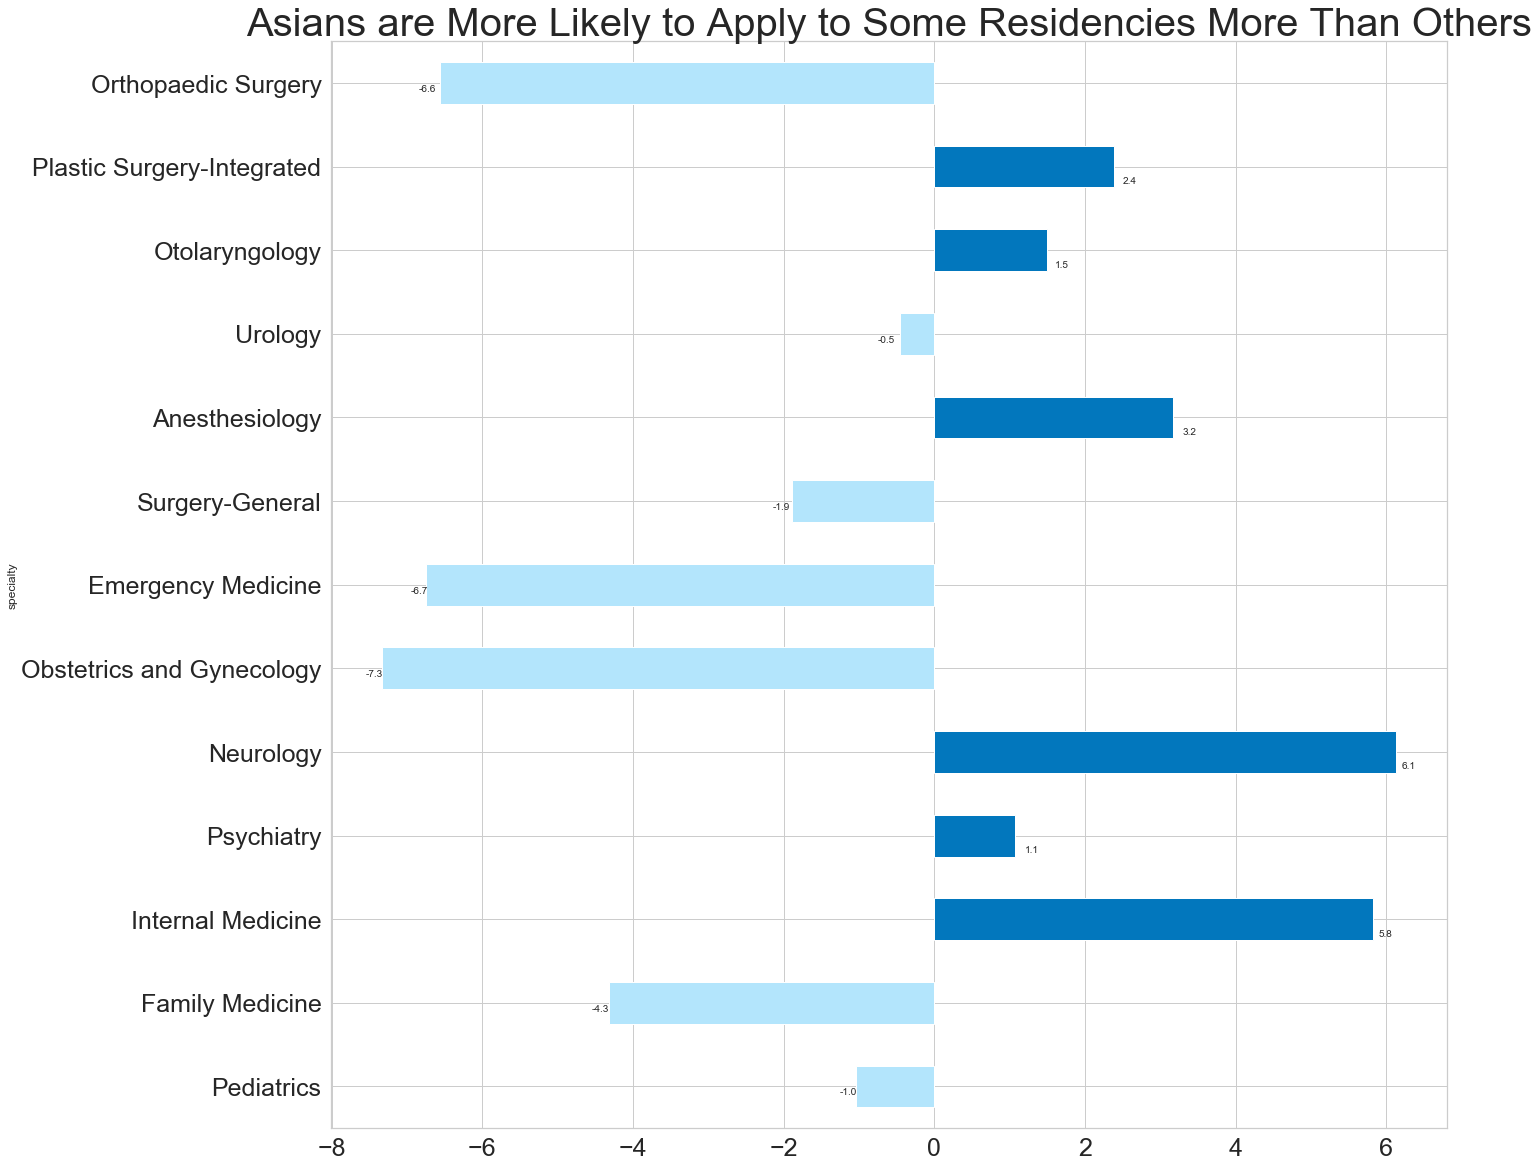

In [61]:
rcParams['figure.figsize'] = 20, 20
asian=medscape[['specialty','asian_diff','salary']].sort_values(by='salary')
asian['c'] = np.where(asian.asian_diff>0, '#0277bd', '#b3e5fc')
ax=asian.plot(kind='barh',x='specialty',y='asian_diff',color=asian['c'])
ax.get_legend().remove()

for i, v in enumerate(asian['asian_diff'].apply(lambda x: round(x, 1)).reset_index(drop=True)):
    if v<0:
        ax.text(v-0.25, i-0.1, str(v))
    else:
        ax.text(v+0.1, i-0.2, str(v))
plt.title('Asians are More Likely to Apply to Some Residencies More Than Others',{'fontsize': 40,'fontweight' : 1})
plt.tick_params(labelsize=25)
plt.savefig("asian_residencies_medscape.pdf")


In [33]:
#atlantic/doxifiy data
atl_salaries=pd.read_csv('atlantic_income.csv')

In [34]:
atl=df.merge(atl_salaries,left_on='specialty',right_on=('specialty'),how='left')

In [35]:
atl=atl.dropna()

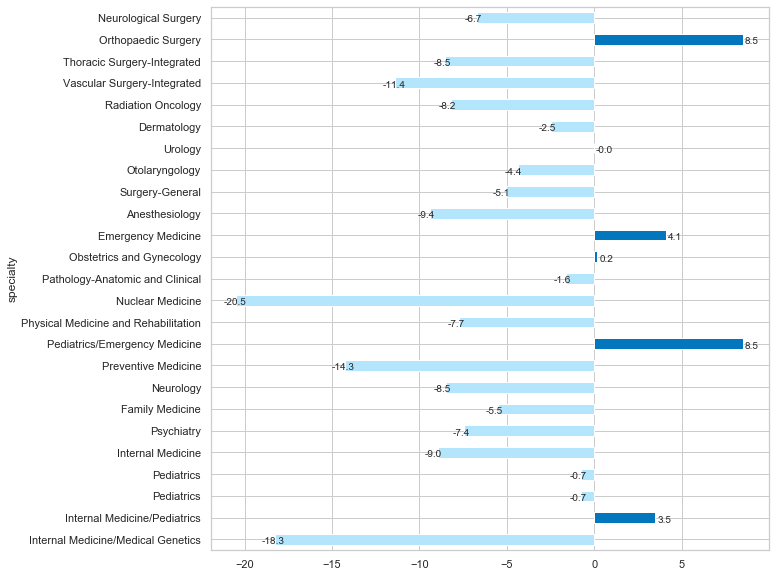

In [36]:
rcParams['figure.figsize'] = 10, 10
white=atl[['specialty','white_diff','salary']].sort_values(by='salary')
white['c'] = np.where(white.white_diff>0, '#0277bd', '#b3e5fc')
ax=white.plot(kind='barh',x='specialty',y='white_diff', color=white['c'])
ax.get_legend().remove()
for i, v in enumerate(white['white_diff'].apply(lambda x: round(x, 1)).reset_index(drop=True)):
    if v<0:
        ax.text(v-0.7, i-0.2, str(v))
    else:
        ax.text(v+0.1, i-0.2, str(v))
        

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


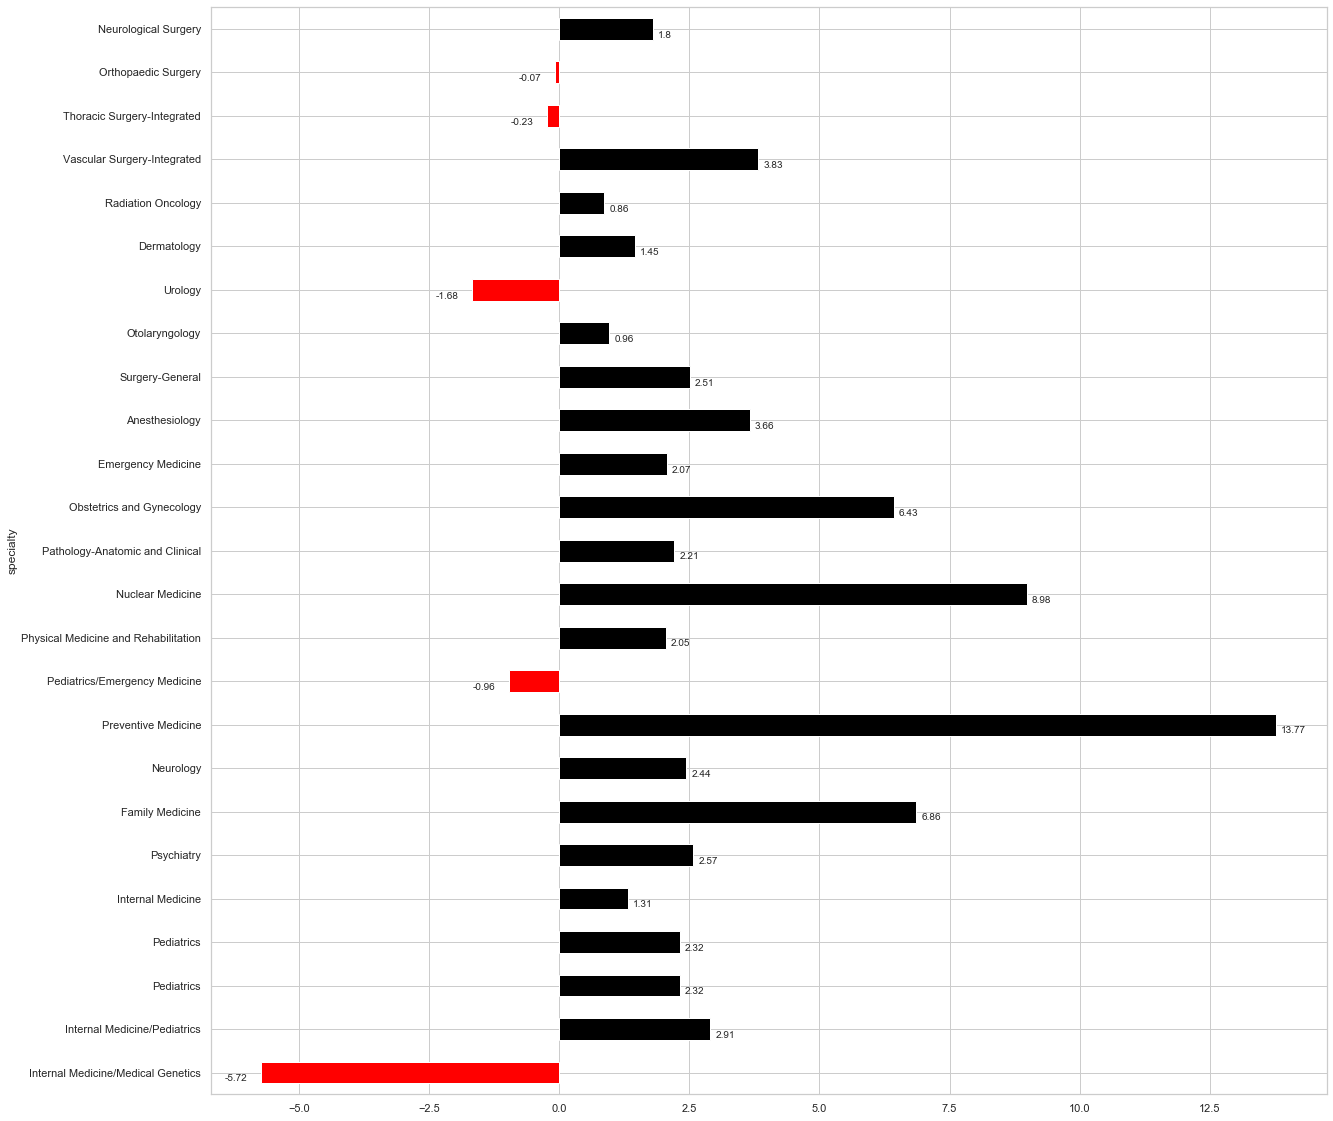

In [98]:
rcParams['figure.figsize'] = 20, 20
black=atl[['specialty','black_diff','salary']].sort_values(by='salary')
black['c'] = np.where(black.black_diff>0, 'black', 'red')
ax=black.plot(kind='barh',x='specialty',y='black_diff', colors=black['c'])
ax.get_legend().remove()
for i, v in enumerate(black['black_diff'].apply(lambda x: round(x, 2)).reset_index(drop=True)):
    if v<0:
        ax.text(v-0.7, i-0.2, str(v))
    else:
        ax.text(v+0.1, i-0.2, str(v))
        

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


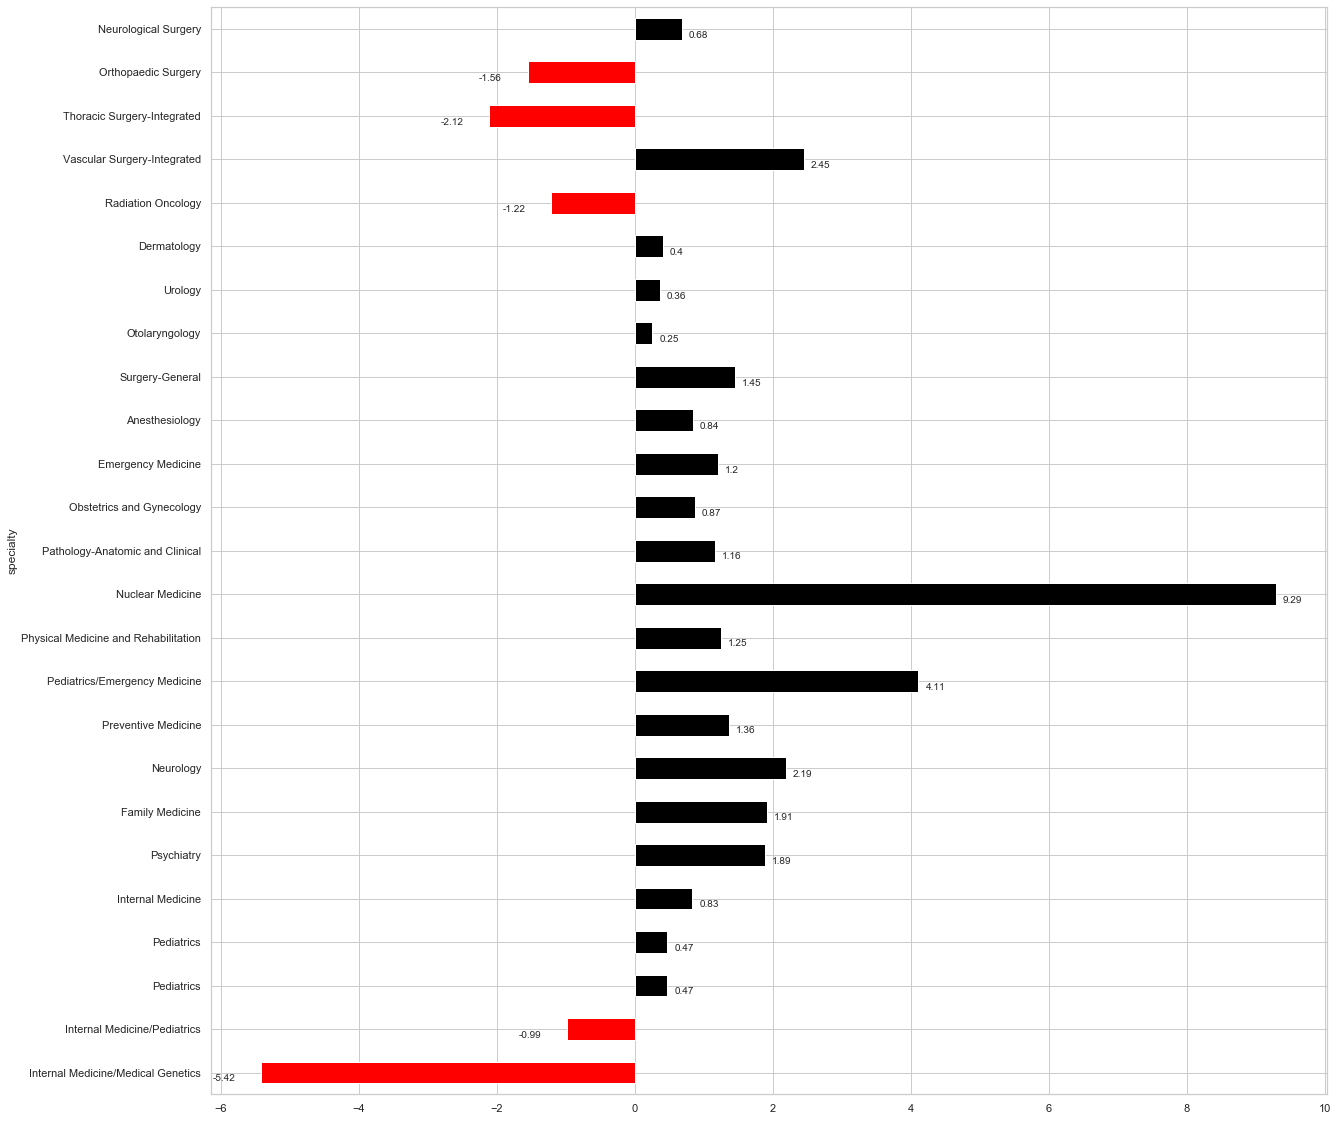

In [102]:
rcParams['figure.figsize'] = 20, 20
hispanic=atl[['specialty','hispanic_diff','salary']].sort_values(by='salary')
hispanic['c'] = np.where(hispanic.hispanic_diff>0, 'black', 'red')
ax=hispanic.plot(kind='barh',x='specialty',y='hispanic_diff', colors=hispanic['c'])
ax.get_legend().remove()
for i, v in enumerate(hispanic['hispanic_diff'].apply(lambda x: round(x, 2)).reset_index(drop=True)):
    if v<0:
        ax.text(v-0.7, i-0.2, str(v))
    else:
        ax.text(v+0.1, i-0.2, str(v))
        

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


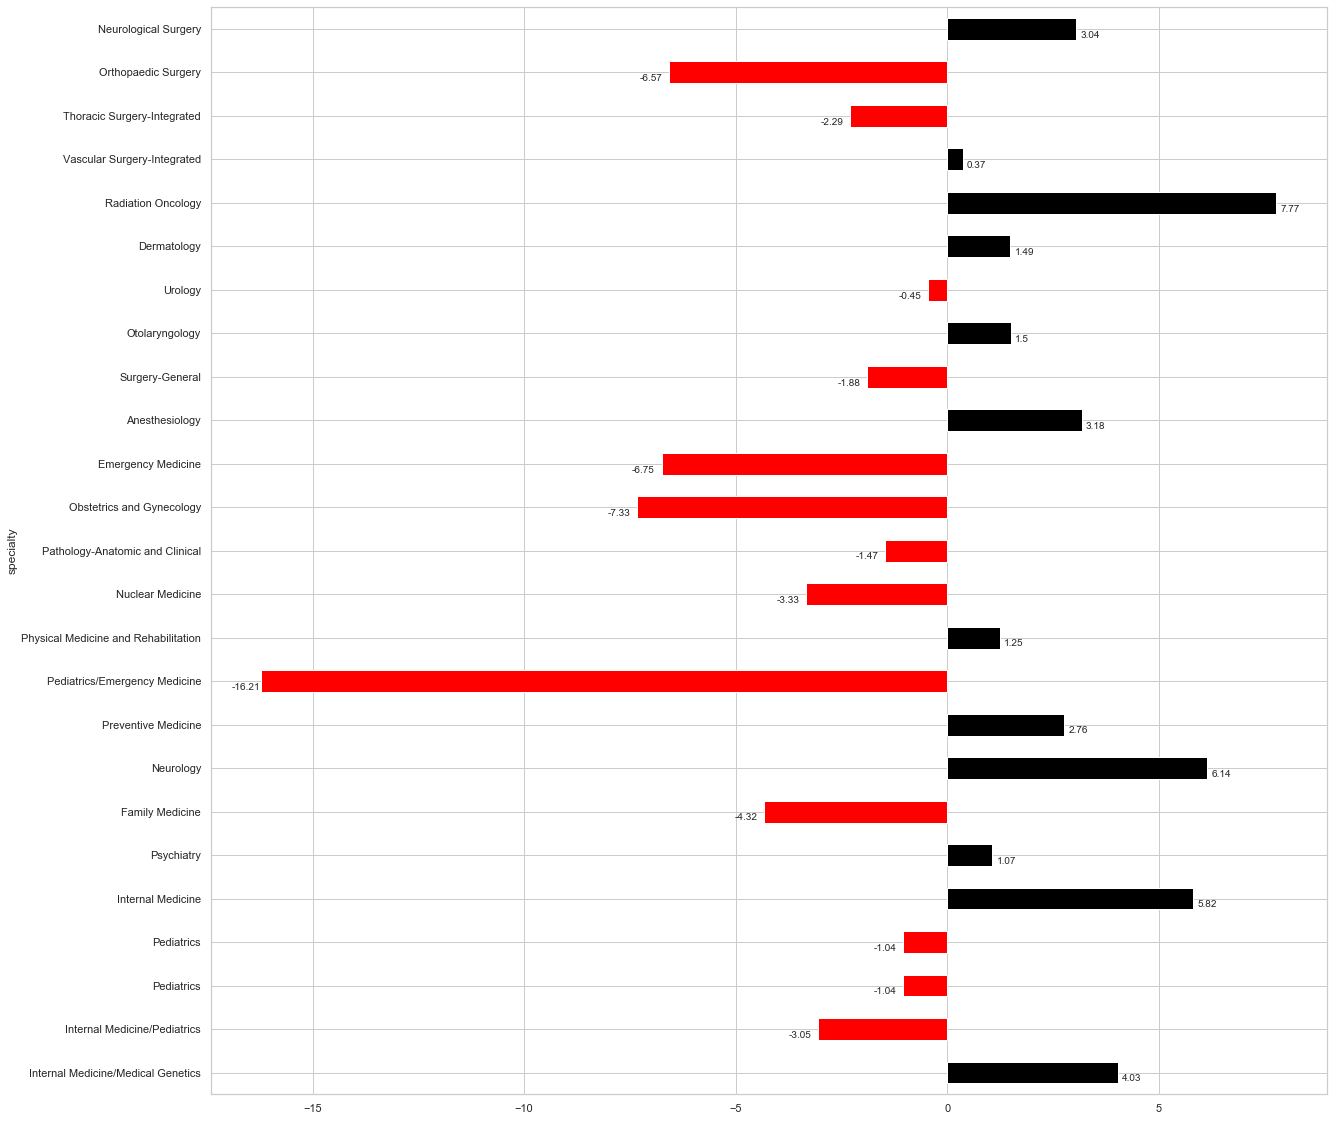

In [103]:
rcParams['figure.figsize'] = 20, 20
asian=atl[['specialty','asian_diff','salary']].sort_values(by='salary')
asian['c'] = np.where(asian.asian_diff>0, 'black', 'red')
ax=asian.plot(kind='barh',x='specialty',y='asian_diff', colors=asian['c'])
ax.get_legend().remove()
for i, v in enumerate(asian['asian_diff'].apply(lambda x: round(x, 2)).reset_index(drop=True)):
    if v<0:
        ax.text(v-0.7, i-0.2, str(v))
    else:
        ax.text(v+0.1, i-0.2, str(v))
        

In [144]:
white.shape

(48, 2)

In [162]:
df_r = white.sample(48)

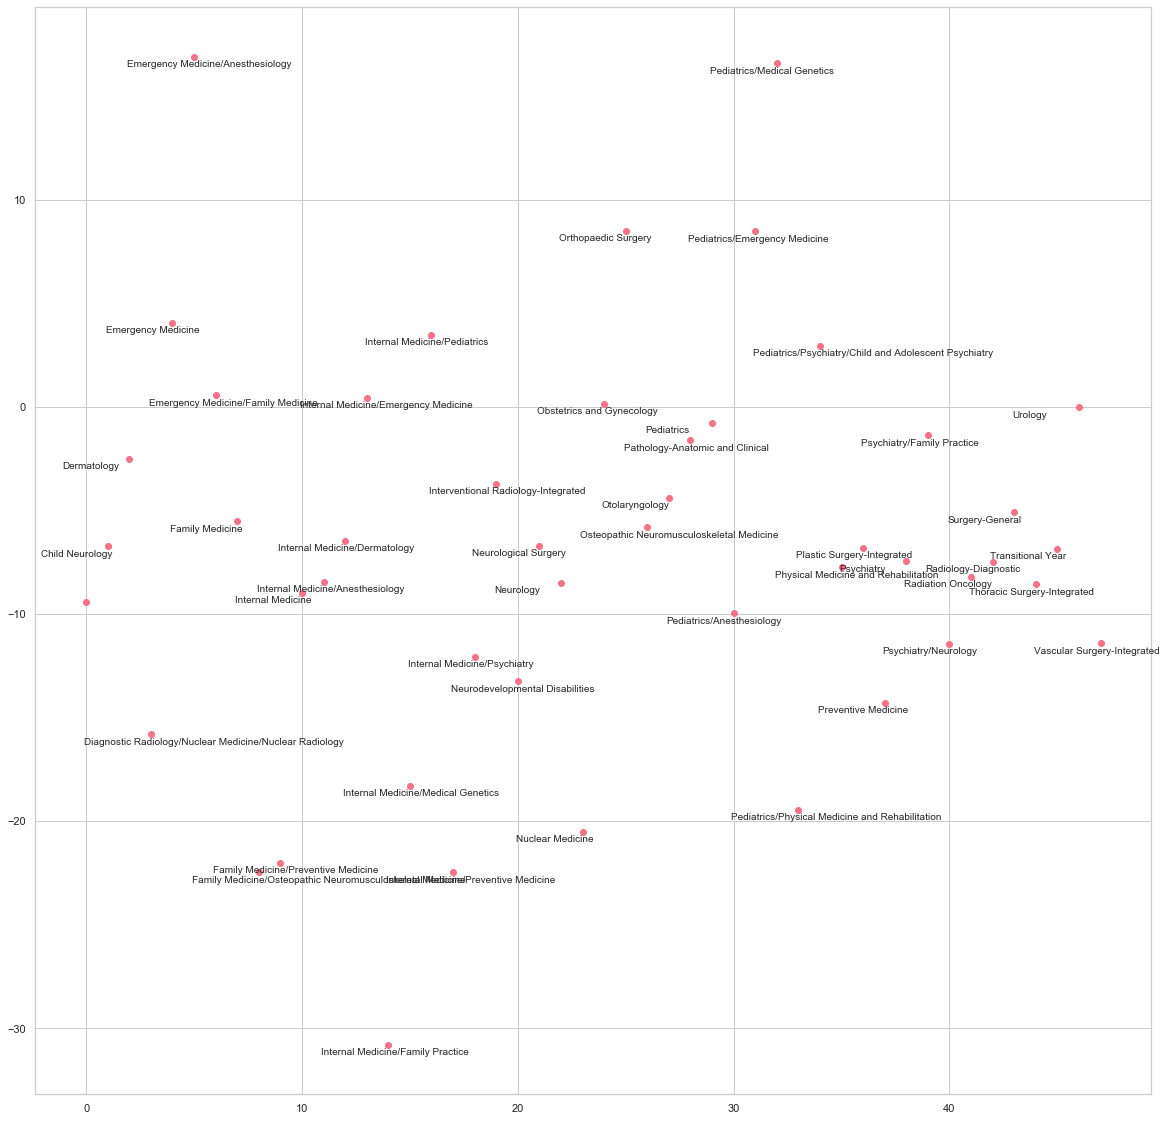

In [163]:
y = df_r.white_diff.values
z = df_r.white_diff.index
n = df_r.specialty.values

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i]-3.1, y[i]-0.5))

In [146]:
df_r.white_diff

11    -8.423529
34     2.958050
32    16.621843
45    -6.832701
25     8.520668
14   -30.791950
30    -9.958617
16     3.500085
9    -21.989133
35    -7.736395
22    -8.489046
28    -1.596939
5     16.935323
39    -1.347506
1     -6.717876
8    -22.458617
43    -5.074545
36    -6.789101
27    -4.374946
15   -18.291950
13     0.458050
40   -11.416950
42    -7.472309
2     -2.476659
19    -3.702814
18   -12.041950
23   -20.497832
33   -19.428314
10    -8.954404
46    -0.011603
4      4.090986
17   -22.458617
37   -14.266526
38    -7.432817
12    -6.449845
44    -8.539203
6      0.571686
7     -5.512804
29    -0.747915
3    -15.791950
31     8.493764
47   -11.409928
0     -9.414343
24     0.179781
20   -13.238759
41    -8.187160
21    -6.688007
26    -5.791950
Name: white_diff, dtype: float64

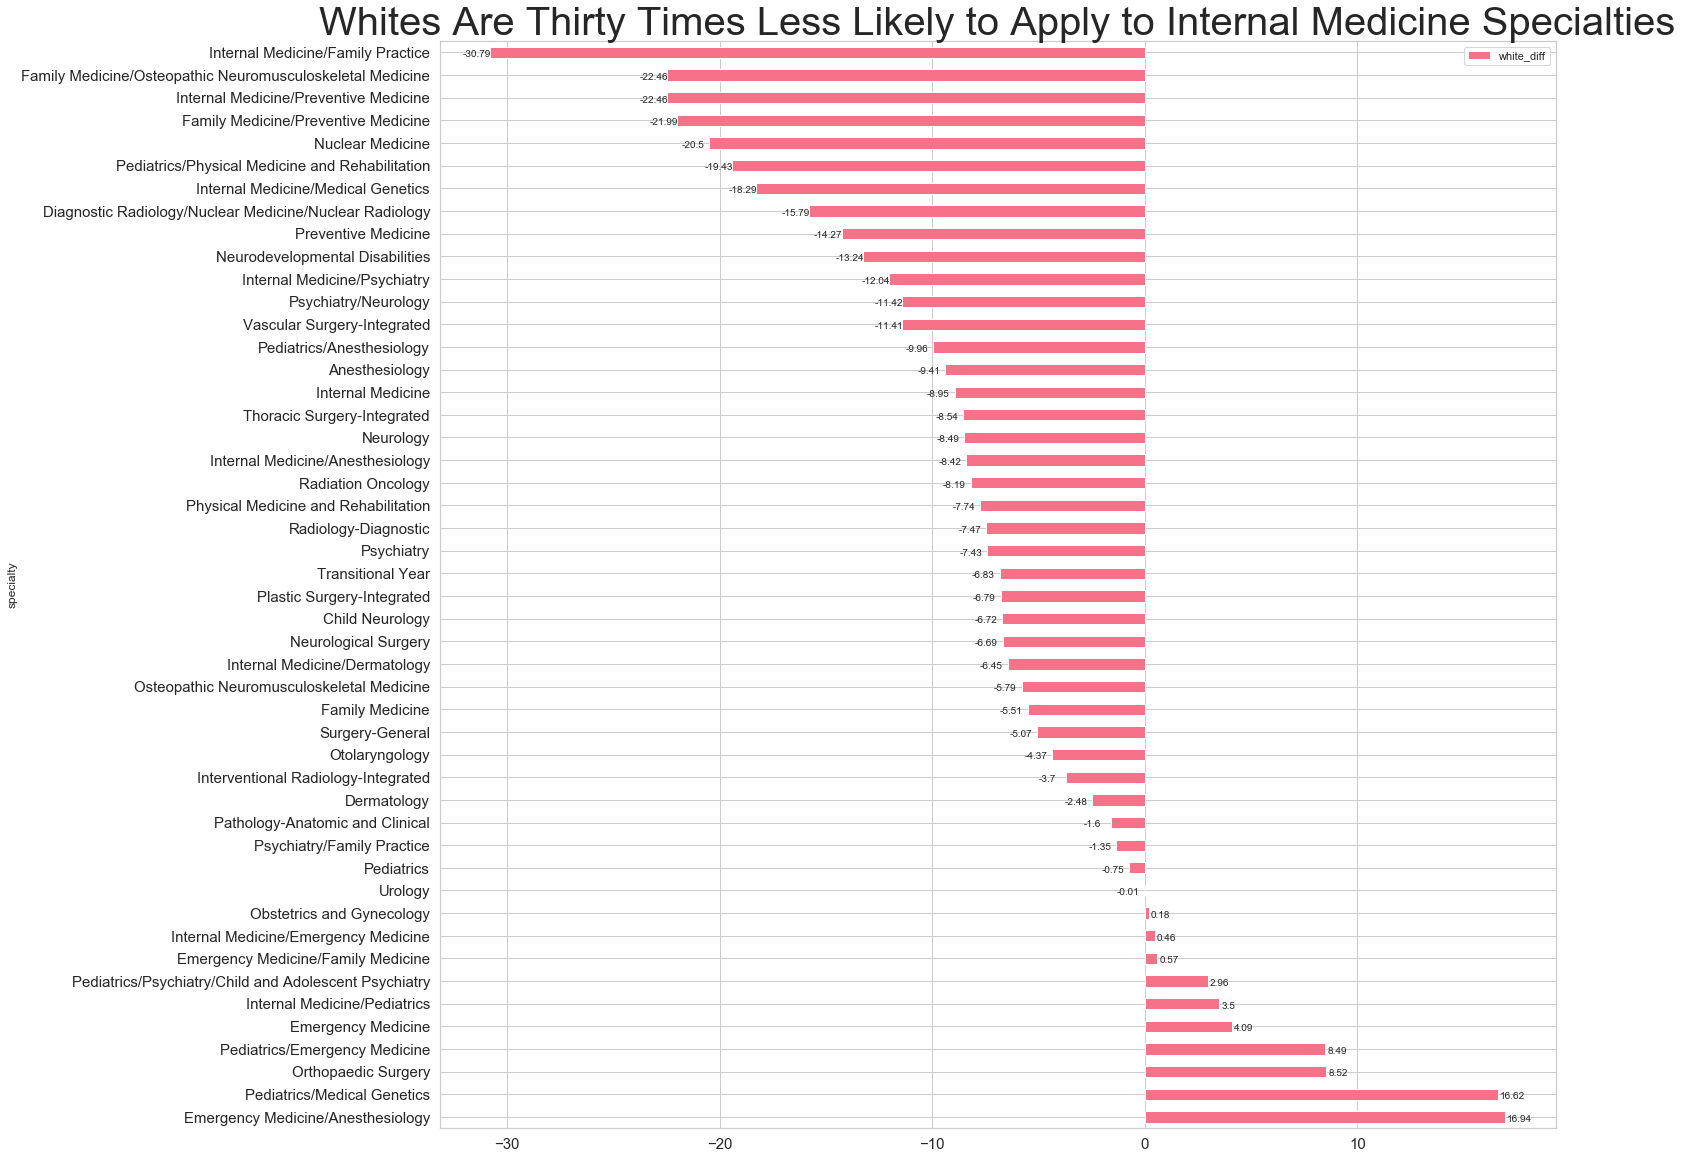

In [165]:
rcParams['figure.figsize'] = 20, 20
white=df[['specialty','white_diff']].sort_values(by='white_diff',ascending=False)
ax=white.plot(kind='barh',x='specialty')

for i, v in enumerate(white['white_diff'].apply(lambda x: round(x, 2)).sort_values(ascending=False).reset_index(drop=True)):
    if v<0:
        ax.text(v-1.3, i-0.2, str(v))
    else:
        ax.text(v+0.1, i-0.2, str(v))
        
    
plt.title('Whites Are Thirty Times Less Likely to Apply to Internal Medicine Specialties',{'fontsize': 40,'fontweight' : 1})
plt.tick_params(labelsize=15)
plt.savefig("whites_residencies.pdf")

In [64]:
# asian=df[['specialty','asian']]
# asian['pct']=asian['asian']/(asian.asian.sum())*100
# asian.sort_values(by='pct',ascending=False)

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,specialty,asian,pct
10,Internal Medicine,2258,28.179209
45,Transitional Year,845,10.545364
43,Surgery-General,612,7.637589
7,Family Medicine,507,6.327218
29,Pediatrics,498,6.214901
0,Anesthesiology,440,5.491077
38,Psychiatry,356,4.442780
42,Radiology-Diagnostic,340,4.243105
4,Emergency Medicine,316,3.943592
22,Neurology,196,2.446025


# Make into Long Data

In [4]:
long=pd.melt(df, id_vars=['specialty'], value_vars=df.columns[1:-1])

In [8]:
long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 3 columns):
specialty    480 non-null object
variable     480 non-null object
value        480 non-null int64
dtypes: int64(1), object(2)
memory usage: 11.3+ KB
